In [5]:
# Image Classification
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt

In [26]:
from PIL import Image

In [2]:
image_path1 = "data\middle-ear-dataset\csom\o2.jpg"

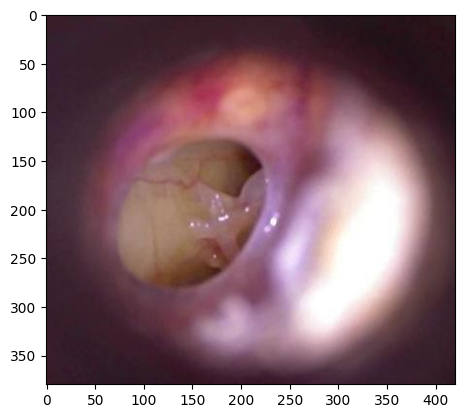

In [8]:
image = Image.open(image_path1)
plt.imshow(image)

In [50]:
transforms = v2.Compose([
    
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    # v2.ToDtype(torch.float32, scale=True),
    v2.ToTensor(),  # Convert PIL image to PyTorch tensor
    
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Grayscale()
    ])

img = transforms(image)
# print(img.size)

c:\Users\Dell\Desktop\Otitis Media\project-otitis-media\venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


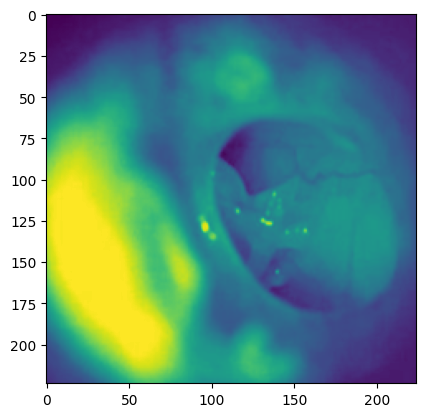

In [51]:
reshaped_img = img.permute(1,2,0)
plt.imshow(reshaped_img)

In [47]:
# Detection (re-using imports and transforms from above)
from torchvision import tv_tensors

img = torch.randint(0, 256, size=(3, 256, 256), dtype=torch.uint8)
boxes = torch.randint(0, 256 // 2, size=(3, 4))
boxes[:, 2:] += boxes[:, :2]
boxes = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=(256, 256))
img = img.to(torch.float32)
# The same transforms can be used!
img, boxes = transforms(img, boxes)
# And you can pass arbitrary input structures
output_dict = transforms({"image": img, "boxes": boxes})